In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import chardet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import ipaddress
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support,precision_score,classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import plot_tree
from mpl_toolkits.mplot3d import Axes3D
import pickle
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv('C:/Users/tabark/Desktop/Proj3/last_data.csv')

In [3]:
data.head()

,No.,Time,Protocol,Length,Source_Type,Destination_Type,label
0,7933,14.707436,CDP,96,MAC_Address,Network_Protocol,cdp
1,11225,1571.331765,OSPF,86,IP_Address,Multicast,ospf
2,19877,12.048962,ICMP,60,IP_Address,Other_Destination,icmp
3,13148,173.111842,DHCP,290,IP_Address,Broadcast,dhcp
4,4054,768.368799,STP,60,MAC_Address,Spanning_Tree_Protocol,safe


In [4]:
data['Protocol'].value_counts()

Protocol
ICMP       22652
CDP        20610
IPv4       20410
OSPF       19792
DHCP       18794
STP        17383
TCP         1312
ARP          627
LOOP         403
DTP          217
TLSv1.2      169
LLC           83
MDNS          56
IGMPv3        33
NTP           29
ICMPv6        27
BROWSER       24
0x6002        12
LLMNR          7
Name: count, dtype: int64

In [5]:
data['Source_Type'].value_counts()

Source_Type
IP_Address     83248
MAC_Address    39392
Name: count, dtype: int64

In [6]:
data['Destination_Type'].value_counts()

Destination_Type
Other_Destination         59903
Network_Protocol          20827
Multicast                 19933
Broadcast                 18666
Spanning_Tree_Protocol     3311
Name: count, dtype: int64

In [7]:
data['label'].value_counts()

label
cdp      20440
ospf     20440
icmp     20440
 dhcp    20440
safe     20440
mac      20440
Name: count, dtype: int64

In [8]:
#Source&Destination encoder
# Label Encoder
le_source = LabelEncoder()
le_destination = LabelEncoder()

data['Source_Type_Encoded'] = le_source.fit_transform(data['Source_Type'])
data['Destination_Type_Encoded'] = le_destination.fit_transform(data['Destination_Type'])


In [9]:
#Protocols encoder
# One-Hot Encoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(data[['Protocol']])

one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out(['Protocol']))

data =pd.concat([data, one_hot_df], axis=1)

In [10]:
#Label encoder
categories = [data['label'].value_counts().index.tolist()]
encoder = OrdinalEncoder(categories=categories)
data['label_encoded'] = encoder.fit_transform(data[['label']])

In [11]:
data.head()

,No.,Time,Protocol,Length,Source_Type,Destination_Type,label,Source_Type_Encoded,Destination_Type_Encoded,Protocol_0x6002,...,Protocol_LLC,Protocol_LLMNR,Protocol_LOOP,Protocol_MDNS,Protocol_NTP,Protocol_OSPF,Protocol_STP,Protocol_TCP,Protocol_TLSv1.2,label_encoded
0,7933,14.707436,CDP,96,MAC_Address,Network_Protocol,cdp,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11225,1571.331765,OSPF,86,IP_Address,Multicast,ospf,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,19877,12.048962,ICMP,60,IP_Address,Other_Destination,icmp,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,13148,173.111842,DHCP,290,IP_Address,Broadcast,dhcp,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,4054,768.368799,STP,60,MAC_Address,Spanning_Tree_Protocol,safe,1,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


In [12]:
data[['label_encoded', 'label']].value_counts()

label_encoded  label
0.0            cdp      20440
1.0            ospf     20440
2.0            icmp     20440
3.0             dhcp    20440
4.0            safe     20440
5.0            mac      20440
Name: count, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122640 entries, 0 to 122639
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   No.                       122640 non-null  int64  
 1   Time                      122640 non-null  float64
 2   Protocol                  122640 non-null  object 
 3   Length                    122640 non-null  int64  
 4   Source_Type               122640 non-null  object 
 5   Destination_Type          122640 non-null  object 
 6   label                     122640 non-null  object 
 7   Source_Type_Encoded       122640 non-null  int64  
 8   Destination_Type_Encoded  122640 non-null  int64  
 9   Protocol_0x6002           122640 non-null  float64
 10  Protocol_ARP              122640 non-null  float64
 11  Protocol_BROWSER          122640 non-null  float64
 12  Protocol_CDP              122640 non-null  float64
 13  Protocol_DHCP             122640 non-null  f

In [14]:
#data=(numerical data)
data = data.select_dtypes(exclude='object')

In [15]:
X = data.drop('label_encoded',axis=1)
y = data['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

In [16]:
def evaluate_model(y_test,y_pred,model_name):

  ClassificationReport = classification_report(y_test,y_pred)
  print(ClassificationReport)

  AccuracyScore = accuracy_score(y_test,y_pred)
  print('AccuracyScore:', int(AccuracyScore*100) ,'%')

  CM = confusion_matrix(y_test, y_pred)
  sns.heatmap(CM, annot=True, fmt='g', yticklabels=['safe','attack'], cmap='Blues')
  plt.yticks(rotation=0)
  plt.ylabel('Actual', fontsize=13)
  z = 'Confusion Matrix of:  '+str(model_name)
  plt.title(z, fontsize=17, pad=20)
  plt.gca().xaxis.set_label_position('top')
  plt.xlabel('Prediction', fontsize=13)
  plt.gca().xaxis.tick_top()
  plt.gca().figure.subplots_adjust(bottom=0.2)
  plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
  plt.show()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4071
         1.0       1.00      1.00      1.00      4127
         2.0       1.00      1.00      1.00      4067
         3.0       1.00      1.00      1.00      4103
         4.0       0.99      1.00      1.00      4119
         5.0       1.00      1.00      1.00      4041

    accuracy                           1.00     24528
   macro avg       1.00      1.00      1.00     24528
weighted avg       1.00      1.00      1.00     24528

AccuracyScore: 99 %


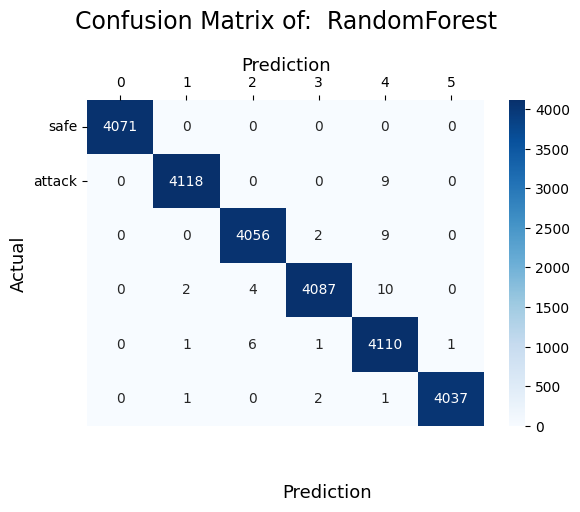

In [17]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',random_state=42) #criterion can be also : entropy
RandomForestClassifierModel.fit(X_train, y_train)
y_pred_RandomForest = RandomForestClassifierModel.predict(X_test)
evaluate_model(y_test,y_pred_RandomForest,'RandomForest')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4071
         1.0       1.00      1.00      1.00      4127
         2.0       1.00      1.00      1.00      4067
         3.0       1.00      1.00      1.00      4103
         4.0       0.99      1.00      1.00      4119
         5.0       1.00      1.00      1.00      4041

    accuracy                           1.00     24528
   macro avg       1.00      1.00      1.00     24528
weighted avg       1.00      1.00      1.00     24528

AccuracyScore: 99 %


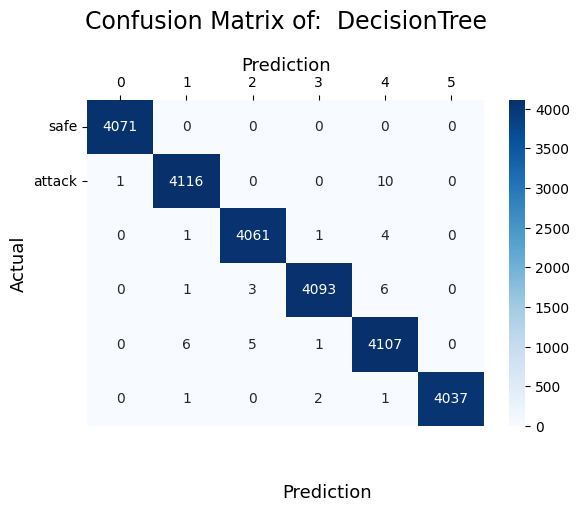

In [18]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=50,random_state=33)
DecisionTreeClassifierModel.fit(X_train, y_train)
y_pred_DecisionTree = DecisionTreeClassifierModel.predict(X_test)
evaluate_model(y_test,y_pred_DecisionTree,'DecisionTree')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4071
         1.0       1.00      1.00      1.00      4127
         2.0       0.85      0.99      0.91      4067
         3.0       1.00      0.99      0.99      4103
         4.0       0.99      1.00      0.99      4119
         5.0       0.99      0.83      0.90      4041

    accuracy                           0.97     24528
   macro avg       0.97      0.97      0.97     24528
weighted avg       0.97      0.97      0.97     24528

AccuracyScore: 96 %


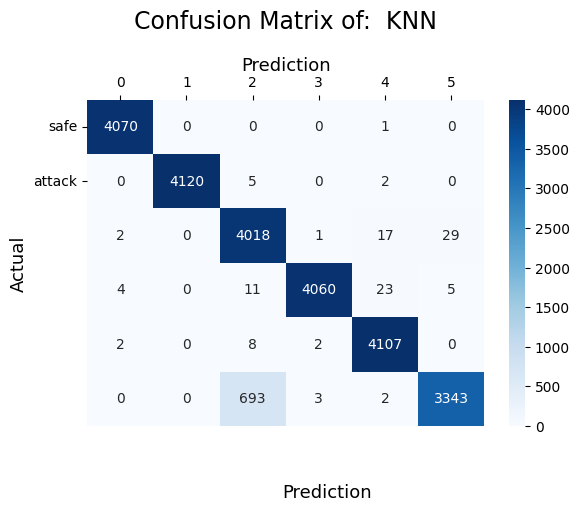

In [19]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 7,weights ='uniform',algorithm='auto')
KNNClassifierModel.fit(X_train, y_train)
y_pred_knn = KNNClassifierModel.predict(X_test)
evaluate_model(y_test,y_pred_knn,'KNN')

In [20]:
from sklearn.metrics import roc_auc_score

y_proba = DecisionTreeClassifierModel.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC AUC Score (Decision Tree):", roc_auc)


ROC AUC Score (Decision Tree): 0.9989510909467324


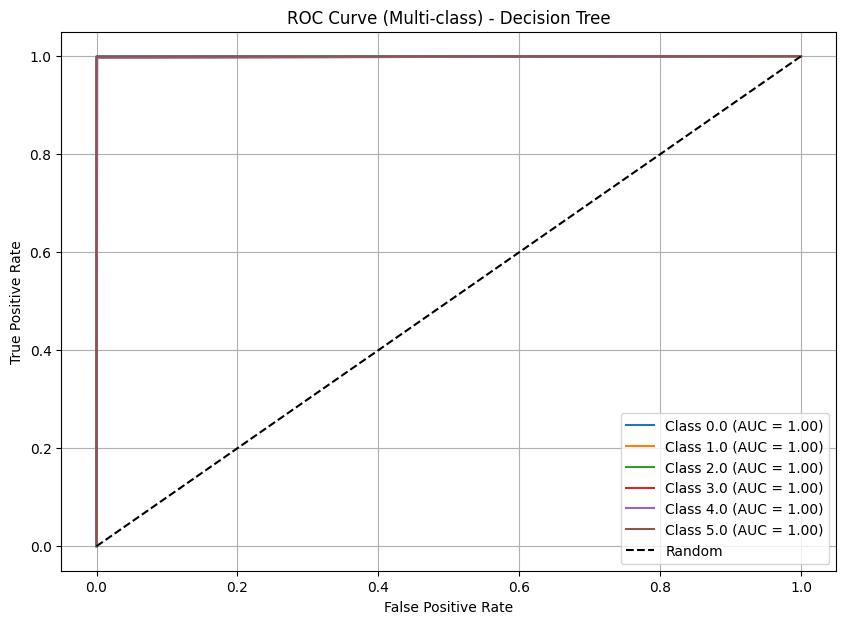

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classes = DecisionTreeClassifierModel.classes_

# binarize y_test
y_test_binarized = label_binarize(y_test, classes=classes)

# probabilities
y_proba = DecisionTreeClassifierModel.predict_proba(X_test)

plt.figure(figsize=(10, 7))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-class) - Decision Tree')
plt.legend()
plt.grid()
plt.show()
